In [0]:
from __future__ import print_function
!pip install numpy==1.16.1
import numpy as np
import nltk

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

import matplotlib.pyplot as plt

nltk.download('punkt')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# restore np.load for future normal usage
np.load = np_load_old

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')



Loading data...
25000 train sequences
25000 test sequences


Pad sequences (samples x time)


W0820 15:38:27.322306 140039418468224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 15:38:27.339578 140039418468224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 15:38:27.342382 140039418468224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 15:38:27.470993 140039418468224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 15:38:27.494463 140039418468224 deprecation_wrappe

x_train shape: (25000, 100)
x_test shape: (25000, 100)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________
None
Train...


W0820 15:38:27.795559 140039418468224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.6480 - acc: 0.5950 - val_loss: 0.5925 - val_acc: 0.7100
Epoch 2/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4547 - acc: 0.7903 - val_loss: 0.4452 - val_acc: 0.7908
Epoch 3/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.3654 - acc: 0.8426 - val_loss: 0.4831 - val_acc: 0.7823
Epoch 4/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.3694 - acc: 0.8430 - val_loss: 0.4864 - val_acc: 0.7955
Epoch 5/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.3226 - acc: 0.8697 - val_loss: 0.5145 - val_acc: 0.7947
Epoch 6/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.3465 - acc: 0.8574 - val_loss: 0.4980 - val_acc: 0.7800
Epoch 7/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.2510 - acc: 0.9054 - val_loss: 0.5209 - val_acc

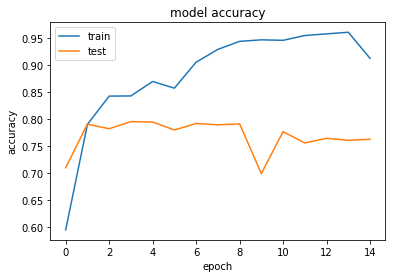

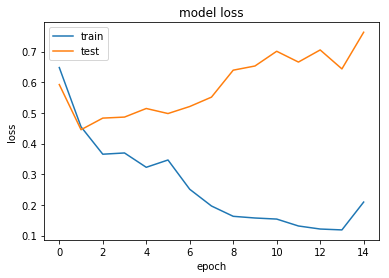

In [0]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15, 
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
id_to_word = {value:key for key,value in word_to_id.items()}
wrongs = 0
pre_cls=model.predict_classes(x_test)
for i in range(len(pre_cls)):
  if(pre_cls[i]!=y_test[i]):
      print(y_test[i])
      print(pre_cls[i])
      print(' '.join(id_to_word[id] for id in x_test[i] ))
      print('\n')
      wrongs+=1

  if(wrongs==3):
    break

0
[1]
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss




1
[0]
the height of that beleaguered country's civil war it would be easy to see this as a parable about those events <UNK> may or may not have had <UNK> turmoil in mind when he made <UNK> but whatever prompted his choice of material the film stands as a cautionary tale of universal application <UNK> could be the soviet union italy germany or japan in the 1930s or any country of any era that lets its guard down and is overwhelmed by tyra

In [0]:
from nltk import word_tokenize
from keras.preprocessing import sequence
word2index = imdb.get_word_index()
test=[]
for word in word_tokenize( "good movie"):
     test.append(word2index[word])

test=sequence.pad_sequences([test],maxlen=100)
model.predict(test)

array([[0.993547]], dtype=float32)